In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [168]:
# dataset 1 - vehicle registrations
registrations = pd.read_csv('data/vehicle_registrations.csv')

registrations.rename(columns={'Electric (EV)': 'Electric'}, inplace=True)

for column_name, values in registrations.items():
    if column_name != 'State':
        registrations[column_name] = registrations[column_name].replace({',': ''}, regex=True).astype(int)

columns_to_remove = ['Plug-In Hybrid Electric (PHEV)', 'Hybrid Electric (HEV)']
registrations['Hybrid'] = registrations[columns_to_remove].sum(axis=1)
registrations.drop(columns=columns_to_remove, inplace=True)

columns_to_remove = ['Gasoline', 'Diesel']
registrations['Fuel'] = registrations[columns_to_remove].sum(axis=1)
registrations.drop(columns=columns_to_remove, inplace=True)

columns_to_remove = ['Biodiesel', 'Ethanol/Flex (E85)', 'Compressed Natural Gas (CNG)', 'Propane', 'Hydrogen', 'Methanol', 'Unknown Fuel']
registrations['Other'] = registrations[columns_to_remove].sum(axis=1)
registrations.drop(columns=columns_to_remove, inplace=True)

In [169]:
# dataset 3 - USA
usa = pd.read_csv('data/usa.csv')

columns_to_int = ['Population', 'Land_area']
usa[columns_to_int] = usa[columns_to_int].replace({',': ''}, regex=True).apply(pd.to_numeric)

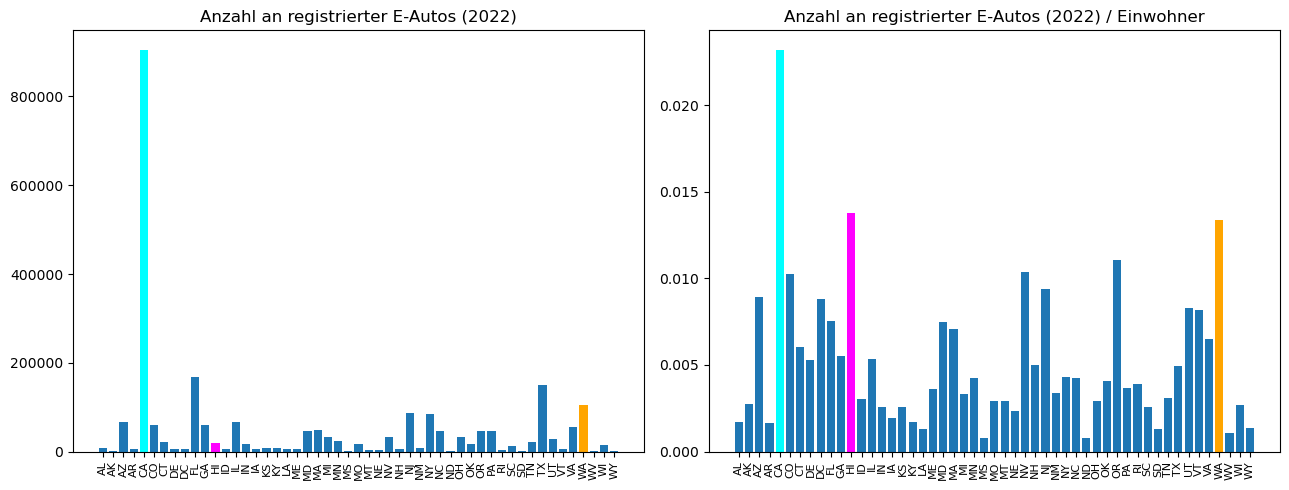

In [174]:
# Anzahl Elektrofahrzeuge je Bundestaat
reg_per_state = registrations[registrations['Year'] == 2022]
reg_per_state = pd.merge(reg_per_state, usa, on='State')

fig, axs = plt.subplots(1, 2, figsize=(13, 5))

axs[0].bar(reg_per_state['Abbreviation'], reg_per_state['Electric'])
axs[0].bar(reg_per_state['Abbreviation'][4], reg_per_state['Electric'][4], color='cyan')
axs[0].bar(reg_per_state['Abbreviation'][11], reg_per_state['Electric'][11], color='magenta')
axs[0].bar(reg_per_state['Abbreviation'][47], reg_per_state['Electric'][47], color='orange')
axs[0].set_title('Anzahl an registrierter E-Autos (2022)')
axs[0].set_xticks(axs[0].get_xticks())
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90, fontsize=8)

reg_pop = reg_per_state['Electric'] / reg_per_state['Population']
axs[1].bar(reg_per_state['Abbreviation'], reg_pop)
axs[1].bar(reg_per_state['Abbreviation'][4], reg_pop[4], color='cyan')
axs[1].bar(reg_per_state['Abbreviation'][11], reg_pop[11], color='magenta')
axs[1].bar(reg_per_state['Abbreviation'][47], reg_pop[47], color='orange')
axs[1].set_title('Anzahl an registrierter E-Autos (2022) / Einwohner')
axs[1].set_xticks(axs[1].get_xticks())
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90, fontsize=8)

plt.tight_layout()
plt.show()

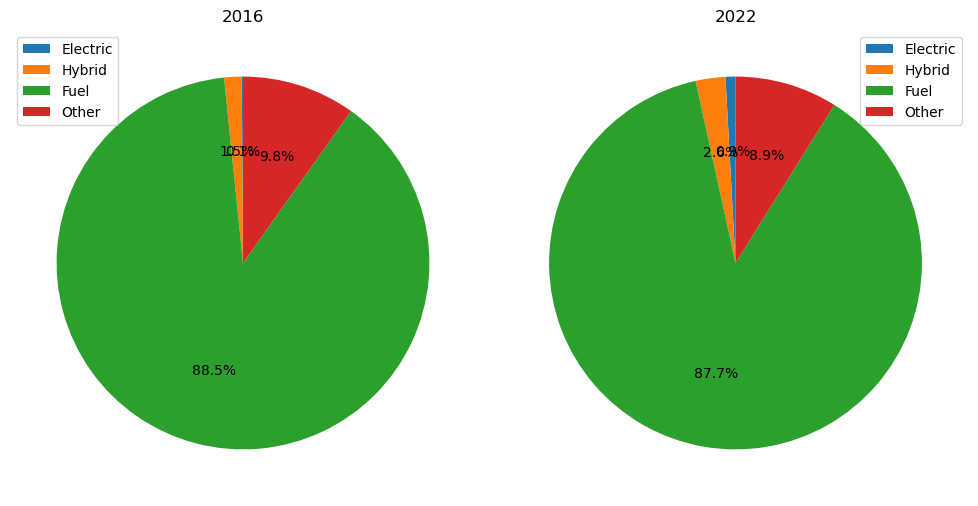

In [171]:
# FIX % LESBAR MACHEN
registrations_type16 = registrations[registrations['Year'] == 2016]
registrations_type16 = registrations_type16.drop(columns={'Year', 'State'})
registrations_type16 = registrations_type16.sum()

registrations_type22 = registrations[registrations['Year'] == 2022]
registrations_type22 = registrations_type22.drop(columns={'Year', 'State'})
registrations_type22 = registrations_type22.sum()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie(registrations_type16, autopct='%1.1f%%', startangle=90)
axs[0].set_title('2016')
axs[0].set_xticks(axs[0].get_xticks())
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90, fontsize=8)
axs[0].legend(registrations_type16.index)

axs[1].pie(registrations_type22, autopct='%1.1f%%', startangle=90)
axs[1].set_title('2022')
axs[1].set_xticks(axs[1].get_xticks())
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90, fontsize=8)
axs[1].legend(registrations_type22.index)

plt.tight_layout()
plt.show()